In [31]:
import sqlite3
import pandas as pd
import numpy as np
import re
from tqdm import trange
from pymongo import MongoClient

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /home/sundooedu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
# conn = sqlite3.connect("db.sqlite3")
# cur = conn.cursor()
# cur.execute("SELECT * FROM modeling")
# rows = cur.fetchall()

In [33]:
# cols = [column[0] for column in cur.description]
# data_df = pd.DataFrame.from_records(data=rows, columns=cols)
# conn.close()

In [34]:
client = MongoClient('mongodb://192.168.0.154:27017/')  # mongo 연결
mydb = client.mydb
board_info = mydb.modelingdb # get Collection with find()

data_df = pd.DataFrame(list(board_info.find()))

In [35]:
data_df

,_id,category,product,title,rank,reviews,link
0,5f295e508fcd48304fd602c8,50000145,닭가슴살,마이닭 닭가슴살 58종 전상품 골라담기,"N=a:lst*A.title,i:81238778644,r:8","13,196",https://adcr.naver.com/adcr?x=QP1mdhRKNyk3yPwY...
1,5f295e508fcd48304fd602c9,50000145,닭가슴살,[맛있닭] 닭가슴살스테이크 외 31종 골라담기,"N=a:lst*A.title,i:10463949223,r:1","394,895",https://adcr.naver.com/adcr?x=NK3fzMMRLucr3Aan...
2,5f295e508fcd48304fd602ca,50000145,닭가슴살,10+1 마이닭 닭가슴살 전상품 골라담기,"N=a:lst*A.title,i:81465025241,r:20","1,855",https://adcr.naver.com/adcr?x=3SbFGcatVcVWAe58...
3,5f295e508fcd48304fd602cb,50000145,닭가슴살,[잇메이트] 훈제 닭가슴살 7종 1팩 골라담기,"N=a:lst*A.title,i:11216830028,r:7","94,805",https://adcr.naver.com/adcr?x=gp75GZuYs5nc86QP...
4,5f295e508fcd48304fd602cc,50000145,닭가슴살,허닭 닭가슴살 35종 골라담기 70g/100g/120g,"N=a:lst*N.title,i:7887607690,r:1","98,516",https://cr.shopping.naver.com/adcr.nhn?x=%2Fwl...
...,...,...,...,...,...,...,...
136730,5f31193c4018c9eaedceb3be,50000026,냉동고구마,토담푸드 롱고구마 치즈스틱 (85gx10입) X12개,"N=a:lst*N.title,i:82396342489,r:491",0,https://cr.shopping.naver.com/adcr.nhn?x=O9d%2...
136731,5f31193c4018c9eaedceb3bf,50000026,냉동고구마,토담푸드 롱고구마 치즈스틱 (85gx10입),"N=a:lst*N.title,i:82396378102,r:492",0,https://cr.shopping.naver.com/adcr.nhn?x=UpvKM...
136732,5f31193c4018c9eaedceb3c0,50000026,냉동고구마,토담푸드 롱고구마 치즈스틱 (85gx10입) X4개,"N=a:lst*N.title,i:82396356453,r:493",0,https://cr.shopping.naver.com/adcr.nhn?x=lB9fE...
136733,5f31193c4018c9eaedceb3c1,50000026,냉동고구마,(냉동)삼육고구마까스 2kg,"N=a:lst*N.title,i:82535289146,r:494",0,https://cr.shopping.naver.com/adcr.nhn?x=ra0bd...


## title 문자 전처리

In [36]:
def clean_str(text):
    pattern = '[-=,#/\?:^$.@\"※~&ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    return text

# map 함수 : Series에서 사용하며 모든 요소에 함수 일괄 적용
# apply 함수 : DataFrame에서 사용하며 각각의 행 또는 열(Series)에 함수 일괄 적용
# applymap 함수 : DataFrame에서 사용하며 모든 요소에 함수 일괄 적용

data_df['title'] = data_df.title.map(clean_str) # 특수기호 제거

# category, product, title → total열로 통합
data_df['category'] = data_df['category'].astype(str)
data_df['total'] = data_df['category']+' '+data_df['product']+' '+data_df['title']
data_df = data_df[['category','product','title','total','rank']]

In [37]:
data_df

,category,product,title,total,rank
0,50000145,닭가슴살,마이닭 닭가슴살 58종 전상품 골라담기,50000145 닭가슴살 마이닭 닭가슴살 58종 전상품 골라담기,"N=a:lst*A.title,i:81238778644,r:8"
1,50000145,닭가슴살,맛있닭 닭가슴살스테이크 외 31종 골라담기,50000145 닭가슴살 맛있닭 닭가슴살스테이크 외 31종 골라담기,"N=a:lst*A.title,i:10463949223,r:1"
2,50000145,닭가슴살,10+1 마이닭 닭가슴살 전상품 골라담기,50000145 닭가슴살 10+1 마이닭 닭가슴살 전상품 골라담기,"N=a:lst*A.title,i:81465025241,r:20"
3,50000145,닭가슴살,잇메이트 훈제 닭가슴살 7종 1팩 골라담기,50000145 닭가슴살 잇메이트 훈제 닭가슴살 7종 1팩 골라담기,"N=a:lst*A.title,i:11216830028,r:7"
4,50000145,닭가슴살,허닭 닭가슴살 35종 골라담기 70g 100g 120g,50000145 닭가슴살 허닭 닭가슴살 35종 골라담기 70g 100g 120g,"N=a:lst*N.title,i:7887607690,r:1"
...,...,...,...,...,...
136730,50000026,냉동고구마,토담푸드 롱고구마 치즈스틱 85gx10입 X12개,50000026 냉동고구마 토담푸드 롱고구마 치즈스틱 85gx10입 X12개,"N=a:lst*N.title,i:82396342489,r:491"
136731,50000026,냉동고구마,토담푸드 롱고구마 치즈스틱 85gx10입,50000026 냉동고구마 토담푸드 롱고구마 치즈스틱 85gx10입,"N=a:lst*N.title,i:82396378102,r:492"
136732,50000026,냉동고구마,토담푸드 롱고구마 치즈스틱 85gx10입 X4개,50000026 냉동고구마 토담푸드 롱고구마 치즈스틱 85gx10입 X4개,"N=a:lst*N.title,i:82396356453,r:493"
136733,50000026,냉동고구마,냉동 삼육고구마까스 2kg,50000026 냉동고구마 냉동 삼육고구마까스 2kg,"N=a:lst*N.title,i:82535289146,r:494"


In [38]:
data_df['total'] = data_df.total.map(word_tokenize)

# result1 = []            # 하나의 리스트화 & extend 함수(멤버 메서드) 이용하여 확장하기
# for i in trange(len(data_df.title)):
#     result1.extend(data_df.title[i])
        
result = []
for i in trange(len(data_df.title)):
    result.append(word_tokenize(data_df.title[i]))

/home/sundooedu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
100%|██████████| 136735/136735 [00:13<00:00, 10470.70it/s]


In [39]:
data_df

,category,product,title,total,rank
0,50000145,닭가슴살,마이닭 닭가슴살 58종 전상품 골라담기,"[50000145, 닭가슴살, 마이닭, 닭가슴살, 58종, 전상품, 골라담기]","N=a:lst*A.title,i:81238778644,r:8"
1,50000145,닭가슴살,맛있닭 닭가슴살스테이크 외 31종 골라담기,"[50000145, 닭가슴살, 맛있닭, 닭가슴살스테이크, 외, 31종, 골라담기]","N=a:lst*A.title,i:10463949223,r:1"
2,50000145,닭가슴살,10+1 마이닭 닭가슴살 전상품 골라담기,"[50000145, 닭가슴살, 10+1, 마이닭, 닭가슴살, 전상품, 골라담기]","N=a:lst*A.title,i:81465025241,r:20"
3,50000145,닭가슴살,잇메이트 훈제 닭가슴살 7종 1팩 골라담기,"[50000145, 닭가슴살, 잇메이트, 훈제, 닭가슴살, 7종, 1팩, 골라담기]","N=a:lst*A.title,i:11216830028,r:7"
4,50000145,닭가슴살,허닭 닭가슴살 35종 골라담기 70g 100g 120g,"[50000145, 닭가슴살, 허닭, 닭가슴살, 35종, 골라담기, 70g, 100...","N=a:lst*N.title,i:7887607690,r:1"
...,...,...,...,...,...
136730,50000026,냉동고구마,토담푸드 롱고구마 치즈스틱 85gx10입 X12개,"[50000026, 냉동고구마, 토담푸드, 롱고구마, 치즈스틱, 85gx10입, X...","N=a:lst*N.title,i:82396342489,r:491"
136731,50000026,냉동고구마,토담푸드 롱고구마 치즈스틱 85gx10입,"[50000026, 냉동고구마, 토담푸드, 롱고구마, 치즈스틱, 85gx10입]","N=a:lst*N.title,i:82396378102,r:492"
136732,50000026,냉동고구마,토담푸드 롱고구마 치즈스틱 85gx10입 X4개,"[50000026, 냉동고구마, 토담푸드, 롱고구마, 치즈스틱, 85gx10입, X4개]","N=a:lst*N.title,i:82396356453,r:493"
136733,50000026,냉동고구마,냉동 삼육고구마까스 2kg,"[50000026, 냉동고구마, 냉동, 삼육고구마까스, 2kg]","N=a:lst*N.title,i:82535289146,r:494"


In [40]:
data_df['title'] = result
data_df['title']

/home/sundooedu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0                    [마이닭, 닭가슴살, 58종, 전상품, 골라담기]
1                  [맛있닭, 닭가슴살스테이크, 외, 31종, 골라담기]
2                   [10+1, 마이닭, 닭가슴살, 전상품, 골라담기]
3                 [잇메이트, 훈제, 닭가슴살, 7종, 1팩, 골라담기]
4         [허닭, 닭가슴살, 35종, 골라담기, 70g, 100g, 120g]
                           ...                  
136730         [토담푸드, 롱고구마, 치즈스틱, 85gx10입, X12개]
136731               [토담푸드, 롱고구마, 치즈스틱, 85gx10입]
136732          [토담푸드, 롱고구마, 치즈스틱, 85gx10입, X4개]
136733                        [냉동, 삼육고구마까스, 2kg]
136734        [떡드림, 고구마, 떡볶이, 1kg, 10개, 냉동, 떡이오]
Name: title, Length: 136735, dtype: object

## rank 추출

In [41]:
splitlst = (data_df['rank'].str.split(',',2))

In [42]:
ranking = []

for i in splitlst:
     ranking.append((i[2].split(':',1)[1]))

ranking

['8',
 '1',
 '20',
 '7',
 '1',
 '43',
 '19',
 '3',
 '26',
 '6',
 '33',
 '23',
 '37',
 '18',
 '11',
 '42',
 '130',
 '64',
 '58',
 '16',
 '39',
 '100',
 '75',
 '73',
 '21',
 '70',
 '51',
 '54',
 '55',
 '26',
 '156',
 '56',
 '150',
 '60',
 '31',
 '50',
 '81',
 '71',
 '57',
 '36',
 '117',
 '78',
 '138',
 '99',
 '41',
 '87',
 '86',
 '52',
 '88',
 '46',
 '51',
 '52',
 '53',
 '54',
 '55',
 '115',
 '84',
 '101',
 '105',
 '56',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',


In [43]:
data_df['rank'] = ranking
data_df['rank']

/home/sundooedu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0           8
1           1
2          20
3           7
4           1
         ... 
136730    491
136731    492
136732    493
136733    494
136734    495
Name: rank, Length: 136735, dtype: object

In [44]:
# db에서 rank값이 text(str)으로 되어있었으므로, 계산위해 int 형으로 변경

data_df['rank'] = data_df['rank'].astype('int')

/home/sundooedu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
type(data_df['rank'][0])

numpy.int64

In [46]:
data_df

,category,product,title,total,rank
0,50000145,닭가슴살,"[마이닭, 닭가슴살, 58종, 전상품, 골라담기]","[50000145, 닭가슴살, 마이닭, 닭가슴살, 58종, 전상품, 골라담기]",8
1,50000145,닭가슴살,"[맛있닭, 닭가슴살스테이크, 외, 31종, 골라담기]","[50000145, 닭가슴살, 맛있닭, 닭가슴살스테이크, 외, 31종, 골라담기]",1
2,50000145,닭가슴살,"[10+1, 마이닭, 닭가슴살, 전상품, 골라담기]","[50000145, 닭가슴살, 10+1, 마이닭, 닭가슴살, 전상품, 골라담기]",20
3,50000145,닭가슴살,"[잇메이트, 훈제, 닭가슴살, 7종, 1팩, 골라담기]","[50000145, 닭가슴살, 잇메이트, 훈제, 닭가슴살, 7종, 1팩, 골라담기]",7
4,50000145,닭가슴살,"[허닭, 닭가슴살, 35종, 골라담기, 70g, 100g, 120g]","[50000145, 닭가슴살, 허닭, 닭가슴살, 35종, 골라담기, 70g, 100...",1
...,...,...,...,...,...
136730,50000026,냉동고구마,"[토담푸드, 롱고구마, 치즈스틱, 85gx10입, X12개]","[50000026, 냉동고구마, 토담푸드, 롱고구마, 치즈스틱, 85gx10입, X...",491
136731,50000026,냉동고구마,"[토담푸드, 롱고구마, 치즈스틱, 85gx10입]","[50000026, 냉동고구마, 토담푸드, 롱고구마, 치즈스틱, 85gx10입]",492
136732,50000026,냉동고구마,"[토담푸드, 롱고구마, 치즈스틱, 85gx10입, X4개]","[50000026, 냉동고구마, 토담푸드, 롱고구마, 치즈스틱, 85gx10입, X4개]",493
136733,50000026,냉동고구마,"[냉동, 삼육고구마까스, 2kg]","[50000026, 냉동고구마, 냉동, 삼육고구마까스, 2kg]",494


## EDA

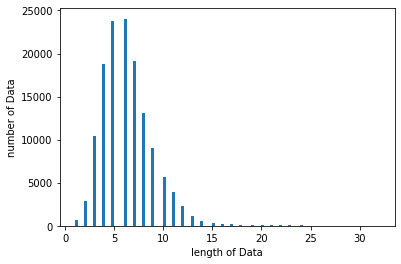

In [47]:
# 상품 제목의 단어 길이 분포

plt.hist([len(s) for s in data_df['title']], bins = 100)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [48]:
rank_max = data_df.groupby(['product'])['rank'].max().reset_index(drop = False)

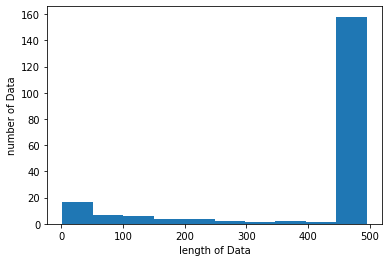

In [49]:
# 상품 랭킹 분포

plt.hist([s for s in rank_max['rank']])
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [50]:
data_df['rank'].value_counts()

1     526
6     436
11    425
21    417
26    396
     ... 
8     157
9     150
5     143
15    140
10    139
Name: rank, Length: 495, dtype: int64

## Make Evaluation Group - A/B/C/D

In [51]:
data_df

,category,product,title,total,rank
0,50000145,닭가슴살,"[마이닭, 닭가슴살, 58종, 전상품, 골라담기]","[50000145, 닭가슴살, 마이닭, 닭가슴살, 58종, 전상품, 골라담기]",8
1,50000145,닭가슴살,"[맛있닭, 닭가슴살스테이크, 외, 31종, 골라담기]","[50000145, 닭가슴살, 맛있닭, 닭가슴살스테이크, 외, 31종, 골라담기]",1
2,50000145,닭가슴살,"[10+1, 마이닭, 닭가슴살, 전상품, 골라담기]","[50000145, 닭가슴살, 10+1, 마이닭, 닭가슴살, 전상품, 골라담기]",20
3,50000145,닭가슴살,"[잇메이트, 훈제, 닭가슴살, 7종, 1팩, 골라담기]","[50000145, 닭가슴살, 잇메이트, 훈제, 닭가슴살, 7종, 1팩, 골라담기]",7
4,50000145,닭가슴살,"[허닭, 닭가슴살, 35종, 골라담기, 70g, 100g, 120g]","[50000145, 닭가슴살, 허닭, 닭가슴살, 35종, 골라담기, 70g, 100...",1
...,...,...,...,...,...
136730,50000026,냉동고구마,"[토담푸드, 롱고구마, 치즈스틱, 85gx10입, X12개]","[50000026, 냉동고구마, 토담푸드, 롱고구마, 치즈스틱, 85gx10입, X...",491
136731,50000026,냉동고구마,"[토담푸드, 롱고구마, 치즈스틱, 85gx10입]","[50000026, 냉동고구마, 토담푸드, 롱고구마, 치즈스틱, 85gx10입]",492
136732,50000026,냉동고구마,"[토담푸드, 롱고구마, 치즈스틱, 85gx10입, X4개]","[50000026, 냉동고구마, 토담푸드, 롱고구마, 치즈스틱, 85gx10입, X4개]",493
136733,50000026,냉동고구마,"[냉동, 삼육고구마까스, 2kg]","[50000026, 냉동고구마, 냉동, 삼육고구마까스, 2kg]",494


In [52]:
rank_max

,product,rank
0,LA갈비,495
1,MCT오일,495
2,가리비,495
3,가정식반찬,495
4,간장게장,495
...,...,...
197,허니버터아몬드,495
198,허닭,495
199,현미닭가슴살핫도그,131
200,홍어무침,490


In [53]:
# 상품명으로 그룹핑하여 최대 랭크값을 찾아 해당 행의 랭크 위치값 도출
score = []

for i in range(len(data_df)):
    p = data_df['product'][i]
    r = data_df['rank'][i]
    for w in range(len(rank_max)):
        if p == rank_max['product'][w]:
            a = r / rank_max['rank'][w]
            score.append(a)
score

[0.01616161616161616,
 0.00202020202020202,
 0.04040404040404041,
 0.014141414141414142,
 0.00202020202020202,
 0.08686868686868687,
 0.03838383838383838,
 0.006060606060606061,
 0.052525252525252523,
 0.012121212121212121,
 0.06666666666666667,
 0.046464646464646465,
 0.07474747474747474,
 0.03636363636363636,
 0.022222222222222223,
 0.08484848484848485,
 0.26262626262626265,
 0.1292929292929293,
 0.11717171717171718,
 0.03232323232323232,
 0.07878787878787878,
 0.20202020202020202,
 0.15151515151515152,
 0.14747474747474748,
 0.04242424242424243,
 0.1414141414141414,
 0.10303030303030303,
 0.10909090909090909,
 0.1111111111111111,
 0.052525252525252523,
 0.3151515151515151,
 0.11313131313131314,
 0.30303030303030304,
 0.12121212121212122,
 0.06262626262626263,
 0.10101010101010101,
 0.16363636363636364,
 0.14343434343434344,
 0.11515151515151516,
 0.07272727272727272,
 0.23636363636363636,
 0.15757575757575756,
 0.2787878787878788,
 0.2,
 0.08282828282828283,
 0.17575757575757575,
 0

In [54]:
len(score)

136735

In [55]:
# 랭크 위치값을 4가지 그룹으로 나누기

s_result = []

for i in score:
    if i >= 0.75:
        s_result.append('D')
    else:
        if i >= 0.5:
            s_result.append('C')
        else:
            if i >= 0.25:
                s_result.append('B')
            else:
                s_result.append('A')
                            
s_result

['A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'B',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'B',
 'A',
 'B',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'B',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B'

In [56]:
data_df['score'] = s_result
data_df

/home/sundooedu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,category,product,title,total,rank,score
0,50000145,닭가슴살,"[마이닭, 닭가슴살, 58종, 전상품, 골라담기]","[50000145, 닭가슴살, 마이닭, 닭가슴살, 58종, 전상품, 골라담기]",8,A
1,50000145,닭가슴살,"[맛있닭, 닭가슴살스테이크, 외, 31종, 골라담기]","[50000145, 닭가슴살, 맛있닭, 닭가슴살스테이크, 외, 31종, 골라담기]",1,A
2,50000145,닭가슴살,"[10+1, 마이닭, 닭가슴살, 전상품, 골라담기]","[50000145, 닭가슴살, 10+1, 마이닭, 닭가슴살, 전상품, 골라담기]",20,A
3,50000145,닭가슴살,"[잇메이트, 훈제, 닭가슴살, 7종, 1팩, 골라담기]","[50000145, 닭가슴살, 잇메이트, 훈제, 닭가슴살, 7종, 1팩, 골라담기]",7,A
4,50000145,닭가슴살,"[허닭, 닭가슴살, 35종, 골라담기, 70g, 100g, 120g]","[50000145, 닭가슴살, 허닭, 닭가슴살, 35종, 골라담기, 70g, 100...",1,A
...,...,...,...,...,...,...
136730,50000026,냉동고구마,"[토담푸드, 롱고구마, 치즈스틱, 85gx10입, X12개]","[50000026, 냉동고구마, 토담푸드, 롱고구마, 치즈스틱, 85gx10입, X...",491,D
136731,50000026,냉동고구마,"[토담푸드, 롱고구마, 치즈스틱, 85gx10입]","[50000026, 냉동고구마, 토담푸드, 롱고구마, 치즈스틱, 85gx10입]",492,D
136732,50000026,냉동고구마,"[토담푸드, 롱고구마, 치즈스틱, 85gx10입, X4개]","[50000026, 냉동고구마, 토담푸드, 롱고구마, 치즈스틱, 85gx10입, X4개]",493,D
136733,50000026,냉동고구마,"[냉동, 삼육고구마까스, 2kg]","[50000026, 냉동고구마, 냉동, 삼육고구마까스, 2kg]",494,D


## csv to mongoDB

In [57]:
data_df

,category,product,title,total,rank,score
0,50000145,닭가슴살,"[마이닭, 닭가슴살, 58종, 전상품, 골라담기]","[50000145, 닭가슴살, 마이닭, 닭가슴살, 58종, 전상품, 골라담기]",8,A
1,50000145,닭가슴살,"[맛있닭, 닭가슴살스테이크, 외, 31종, 골라담기]","[50000145, 닭가슴살, 맛있닭, 닭가슴살스테이크, 외, 31종, 골라담기]",1,A
2,50000145,닭가슴살,"[10+1, 마이닭, 닭가슴살, 전상품, 골라담기]","[50000145, 닭가슴살, 10+1, 마이닭, 닭가슴살, 전상품, 골라담기]",20,A
3,50000145,닭가슴살,"[잇메이트, 훈제, 닭가슴살, 7종, 1팩, 골라담기]","[50000145, 닭가슴살, 잇메이트, 훈제, 닭가슴살, 7종, 1팩, 골라담기]",7,A
4,50000145,닭가슴살,"[허닭, 닭가슴살, 35종, 골라담기, 70g, 100g, 120g]","[50000145, 닭가슴살, 허닭, 닭가슴살, 35종, 골라담기, 70g, 100...",1,A
...,...,...,...,...,...,...
136730,50000026,냉동고구마,"[토담푸드, 롱고구마, 치즈스틱, 85gx10입, X12개]","[50000026, 냉동고구마, 토담푸드, 롱고구마, 치즈스틱, 85gx10입, X...",491,D
136731,50000026,냉동고구마,"[토담푸드, 롱고구마, 치즈스틱, 85gx10입]","[50000026, 냉동고구마, 토담푸드, 롱고구마, 치즈스틱, 85gx10입]",492,D
136732,50000026,냉동고구마,"[토담푸드, 롱고구마, 치즈스틱, 85gx10입, X4개]","[50000026, 냉동고구마, 토담푸드, 롱고구마, 치즈스틱, 85gx10입, X4개]",493,D
136733,50000026,냉동고구마,"[냉동, 삼육고구마까스, 2kg]","[50000026, 냉동고구마, 냉동, 삼육고구마까스, 2kg]",494,D


In [58]:
mongo = []

for i in range(len(data_df)):
    cate = data_df['category'][i]    
    prod = data_df['product'][i]
    title = data_df['title'][i]
    total = data_df['total'][i]
    score = data_df['score'][i]
    mg_dict = {'category':cate, 'product':prod, 'title':title,'total':total,'score':score}
    mongo.append(mg_dict)

mongo

[{'category': '50000145',
  'product': '닭가슴살',
  'title': ['마이닭', '닭가슴살', '58종', '전상품', '골라담기'],
  'score': 'A'},
 {'category': '50000145',
  'product': '닭가슴살',
  'title': ['맛있닭', '닭가슴살스테이크', '외', '31종', '골라담기'],
  'score': 'A'},
 {'category': '50000145',
  'product': '닭가슴살',
  'title': ['10+1', '마이닭', '닭가슴살', '전상품', '골라담기'],
  'score': 'A'},
 {'category': '50000145',
  'product': '닭가슴살',
  'title': ['잇메이트', '훈제', '닭가슴살', '7종', '1팩', '골라담기'],
  'score': 'A'},
 {'category': '50000145',
  'product': '닭가슴살',
  'title': ['허닭', '닭가슴살', '35종', '골라담기', '70g', '100g', '120g'],
  'score': 'A'},
 {'category': '50000145',
  'product': '닭가슴살',
  'title': ['오다닭', '국내산', '냉동', '생닭가슴살', '10kg', '1kg', '10팩'],
  'score': 'A'},
 {'category': '50000145',
  'product': '닭가슴살',
  'title': ['바디나인', '닭가슴살', '1+1', '골라담기', '63종전제품'],
  'score': 'A'},
 {'category': '50000145',
  'product': '닭가슴살',
  'title': ['슬릭마켓', '한끼볼', '5종', '닭가슴살볼', '10팩'],
  'score': 'A'},
 {'category': '50000145',
  'product': '닭가슴살',


In [59]:
from pymongo import MongoClient
client = MongoClient('mongodb://192.168.0.154:27017/')
mydb = client.mydb
makeCollection = mydb.processed.insert_many(mongo)

client.close()